# Unit 5 - Financial Planning


In [1]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price

eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $84014.04
The current value of your 5.3 ETH is $11437.69


###### 

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares

my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url = "https://paper-api.alpaca.markets",
    api_version = "v2")

In [8]:
# Format current date as ISO format

today = pd.Timestamp('2021-03-19', tz = 'America/New_York').isoformat()

# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG

df_shares = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Preview DataFrame

df_shares


AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [9]:
# Pick AGG and SPY close prices

agg_close_price = float(df_shares["AGG"]["close"])
spy_close_price = float(df_shares['SPY']["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [10]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [11]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame

total_crypto = (my_btc_value + my_eth_value)
total_shares = (my_spy_value + my_agg_value)

savings_data = {'Amount':[total_crypto, total_shares]}

df_savings = pd.DataFrame(savings_data, index = ['Crypto','Shares'])
df_savings

,Amount
Crypto,95451.727752
Shares,42175.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

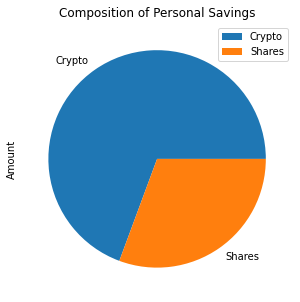

In [12]:
# Plot savings pie chart

df_savings.plot.pie(y = 'Amount', figsize = (5,5), title = "Composition of Personal Savings")


In [13]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = total_crypto + total_shares
total_savings

# Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations Jude! You have enough money in this fund. You have a total savings of ${total_savings:0.2f}")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal, Jude")
elif emergency_fund > total_savings:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from reaching your goal")

Congratulations Jude! You have enough money in this fund. You have a total savings of $137626.73


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
#Set start and end dates of five years back from today(part 1 of 2).

start_date = pd.Timestamp('2016-03-19', tz = "America/New_York").isoformat()
end_date = pd.Timestamp('2019-03-19', tz = "America/New_York").isoformat()

In [16]:
# Get 3 years' worth of historical data for SPY and AGG

df_shares1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
        
).df

# Display sample data

df_shares1.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2016-03-21 00:00:00-04:00  204.07  204.94  203.800  204.68  55119916  
2016-03-22 00:00:00-04:00  203.76  205.23  203.570  204.59  71913432  
2016-03-23 00:00:00-04:00  204.11  204.33  203.010  203.24  67124272  
2016-03-24 00:00:00-04:00  202.00  203.16  201.740  203.14  63975239  
2016-03-28 00:00:00-04:00  203.61  203.86  202.705  203.26  51054477

In [17]:
#Set start and end dates of five years back from today(part 2 of 2).

start_date = pd.Timestamp('2019-03-20', tz = "America/New_York").isoformat()
end_date = pd.Timestamp('2021-03-19', tz = "America/New_York").isoformat()

# Get 2 years' worth of historical data for SPY and AGG

df_shares2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000    
    
).df

# Display sample data

df_shares2.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2019-03-20 00:00:00-04:00  107.71  108.0899  107.6700  108.06  3595337.0   
2019-03-21 00:00:00-04:00  108.13  108.1752  108.0500  108.09  3967485.0   
2019-03-22 00:00:00-04:00  108.46  108.7550  108.3700  108.63  2293602.0   
2019-03-25 00:00:00-04:00  108.63  108.9890  108.6000  108.82  2949892.0   
2019-03-26 00:00:00-04:00  108.76  108.9300  107.5923  108.84  2253736.0   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2019-03-20 00:00:00-04:00  282.16  283.5000  280.32  281.53   75155036  
2019-03-21 00:00:00-04:00  280.64  285.1800  280.59  284.67   70057220  
2019-03-22 00:00:00-04:00  283.22  283.8034  279.18  279.25  109874331  
2019-03-25 00:00:00-04:00  278.87  280.1853  277.64  279.03   75858918  
2019-03-26 00:00:00-04:00  280.99  282.1800  279.56  281.02   58474043

In [18]:
# Join df_shares1 and df_shares2 to get full five years of data 

df_shares = pd.concat([df_shares1, df_shares2], join="inner")

df_shares

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255.0   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871.0   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804.0   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598.0   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202.0   
...                           ...       ...       ...      ...        ...   
2021-03-15 00:00:00-04:00  113.60  114.0100  113.6000  113.940  4210749.0   
2021-03-16 00:00:00-04:00  113.97  114.0320  113.7800  113.870  3977851.0   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.870  5023810.0   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.420  6077516.0   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.500  4674852.0   

                               SPY                                      
                              open     high      low   close    volume  
time                                                                    
2016-03-21 00:00:00-04:00  204.070  204.940  203.800  204.68  55119916  
2016-03-22 00:00:00-04:00  203.760  205.230  203.570  204.59  71913432  
2016-03-23 00:00:00-04:00  204.110  204.330  203.010  203.24  67124272  
2016-03-24 00:00:00-04:00  202.000  203.160  201.740  203.14  63975239  
2016-03-28 00:00:00-04:00  203.610  203.860  202.705  203.26  51054477  
...                            ...      ...      ...     ...       ...  
2021-03-15 00:00:00-04:00  394.330  396.685  392.030  396.47  64471980  
2021-03-16 00:00:00-04:00  397.070  397.830  395.080  395.94  65719794  
2021-03-17 00:00:00-04:00  394.530  398.120  393.300  397.22  61876016  
2021-03-18 00:00:00-04:00  394.475  396.720  390.750  391.41  98794050  
2021-03-19 00:00:00-04:00  389.880  391.569  387.150  389.50  93819590  

[1259 rows x 10 columns]

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data

MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255.0   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871.0   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804.0   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598.0   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2016-03-21 00:00:00-04:00          NaN  204.07  204.94  203.800  204.68   
2016-03-22 00:00:00-04:00    -0.000546  203.76  205.23  203.570  204.59   
2016-03-23 00:00:00-04:00     0.002185  204.11  204.33  203.010  203.24   
2016-03-24 00:00:00-04:00     0.000227  202.00  203.16  201.740  203.14   
2016-03-28 00:00:00-04:00     0.000499  203.61  203.86  202.705  203.26   

                                                  
                             volume daily_return  
time                                              
2016-03-21 00:00:00-04:00  55119916          NaN  
2016-03-22 00:00:00-04:00  71913432    -0.000440  
2016-03-23 00:00:00-04:00  67124272    -0.006599  
2016-03-24 00:00:00-04:00  63975239    -0.000492  
2016-03-28 00:00:00-04:00  51054477     0.000591

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002152,1.014329,0.995835,1.011770,1.007815,0.987360,0.985963,0.998285,0.999737,1.005372,...,0.996445,1.006748,0.988665,1.000176,1.013220,0.993583,1.003124,1.008199,0.999328,0.994131
2,1.002528,1.014510,1.003358,1.014897,1.000882,0.988061,0.987676,0.999548,0.995222,1.000570,...,1.000515,1.006840,1.005306,1.007637,1.015411,0.998226,1.001817,1.007207,1.004474,0.992599
3,1.009030,1.023364,0.994541,1.004589,0.996760,0.982716,0.973318,0.989311,1.002222,1.002985,...,0.998532,1.006002,1.006378,1.011339,1.026518,0.993674,1.019947,0.990267,1.000049,1.005147
4,0.999460,1.015601,0.992330,0.998870,0.999409,0.979112,0.985183,1.001301,0.994007,0.995174,...,0.995302,1.012971,1.015630,1.020115,1.021001,0.994349,1.017380,0.984333,1.000730,1.006864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.035081,13.361246,10.109093,22.589325,16.438287,17.032407,6.596892,36.266026,10.806406,9.883686,...,10.810199,7.639212,14.772926,16.928200,5.349931,17.469574,14.392069,12.572650,10.044998,14.671599
7557,9.945758,13.439862,10.177118,22.780293,16.345907,16.767150,6.668024,36.299139,11.003634,9.964960,...,10.920528,7.617540,14.840573,16.918084,5.330674,17.320168,14.229924,12.778471,10.161461,14.780470
7558,10.031079,13.454029,10.082722,22.827431,16.460105,16.705038,6.692935,36.679432,11.026021,9.969670,...,11.084797,7.666013,14.835381,16.840816,5.308197,17.143888,14.295000,12.787377,10.139456,14.641173
7559,9.996484,13.230179,10.095138,22.676120,16.262389,16.604076,6.661631,36.635504,11.057664,9.946766,...,11.131107,7.711174,14.803920,16.763473,5.286173,16.886714,14.422415,12.693460,10.188212,14.797249


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

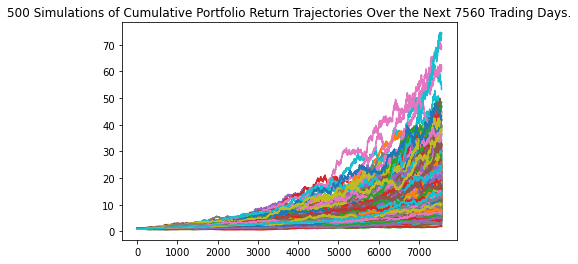

In [22]:
# Plot simulation outcomes

MC_thirtyyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

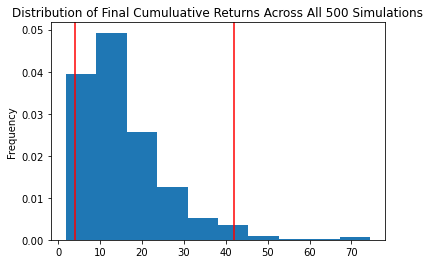

In [23]:
# Plot probability distribution and confidence intervals

MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stats = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics

print(summary_stats)

count           500.000000
mean             15.539774
std              10.142497
min               1.793712
25%               8.239892
50%              13.294466
75%              19.852354
max              74.457695
95% CI Lower      3.874540
95% CI Upper     41.883074
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77490.81 and $837661.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment

initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $116236.21 and $1256492.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001085,0.995275,1.000710,0.988831,0.989719,1.003060,1.007397,0.984965,0.996303,0.993076,...,0.988410,1.000261,1.005873,0.998647,0.994070,1.011000,1.006024,1.005776,0.990652,1.007110
2,0.986795,0.988241,0.994357,0.985606,0.995931,1.007240,1.017919,0.991049,0.999529,0.982915,...,0.989440,1.001495,1.019595,1.018214,0.990851,1.008032,1.006168,1.014161,1.011148,1.004472
3,0.987854,0.988325,1.003796,0.982567,0.999454,1.008929,1.024194,0.997583,0.985278,0.977619,...,0.994299,0.998872,1.014063,1.032410,0.980701,1.010124,1.004228,1.019896,1.012793,0.999632
4,0.987716,0.996388,1.014161,0.990844,0.992420,1.004956,1.016986,0.986409,0.997491,0.986894,...,1.004758,0.991255,1.006583,1.028452,0.990545,1.014763,1.005796,1.014062,1.032336,0.995835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.953755,1.152324,2.013217,1.917249,1.787883,1.466992,4.479283,1.315615,1.888588,1.864098,...,1.162895,0.987144,1.291943,1.995402,1.170723,1.433569,1.730922,4.098491,1.458381,1.824190
1257,1.938147,1.150784,2.019282,1.926495,1.770616,1.479532,4.455605,1.328218,1.880645,1.856613,...,1.155833,0.973123,1.297653,1.999546,1.192944,1.449116,1.730830,4.108070,1.474156,1.813875
1258,1.924950,1.144045,2.028766,1.963048,1.787684,1.488497,4.505717,1.321346,1.874996,1.900051,...,1.173558,0.977194,1.285353,1.985829,1.186648,1.459674,1.742378,4.079579,1.474364,1.789510
1259,1.952002,1.130528,2.010802,1.943571,1.796676,1.501167,4.455840,1.317637,1.908827,1.931020,...,1.167905,0.957798,1.265282,1.950873,1.186342,1.490320,1.737400,4.097946,1.480428,1.808403


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

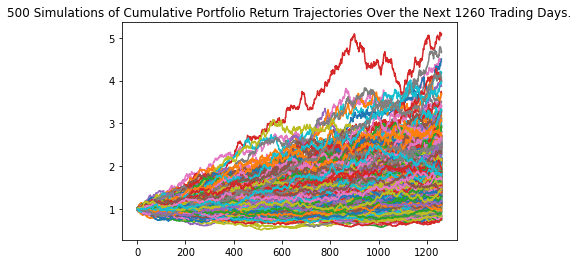

In [29]:
# Plot simulation outcomes

MC_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

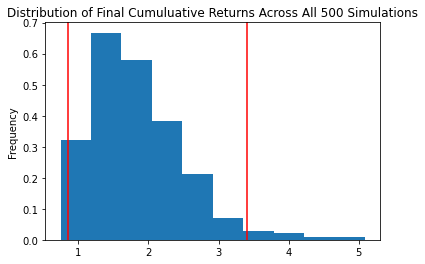

In [30]:
# Plot probability distribution and confidence intervals

MC_fiveyear.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              1.839391
std               0.668853
min               0.744688
25%               1.379857
50%               1.731145
75%               2.168466
max               5.089416
95% CI Lower      0.848586
95% CI Upper      3.407573
Name: 1260, dtype: float64


In [32]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50915.19 and $204454.36


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.15,.85],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002576,0.995710,0.989649,1.009327,1.001219,1.003541,1.003489,1.000154,0.989040,1.011640,...,1.007750,0.988993,0.986730,0.997439,0.984758,1.010769,1.003125,1.005327,1.006394,0.998992
2,0.976873,1.003546,0.998044,1.011368,0.996740,1.002368,1.011297,0.987099,0.975834,1.004950,...,1.017876,0.983836,0.990529,1.000553,1.006652,1.019195,0.996228,1.005026,1.013189,1.002778
3,0.971393,1.015715,1.006140,1.021821,0.996353,1.008926,1.002768,0.981715,0.974527,1.011564,...,1.022999,0.982043,0.981486,1.014843,0.999206,1.018618,1.018225,0.995105,1.012875,1.009689
4,0.965238,1.012702,1.000029,1.038999,1.011341,1.006990,0.993852,0.973334,0.979827,1.023074,...,1.017440,0.964885,0.989736,1.032852,0.999956,1.007049,1.014734,1.010541,1.006191,0.996500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.640826,2.238387,2.560882,2.825612,2.065273,0.988580,1.971349,3.687527,5.916703,3.895793,...,2.429822,1.835493,3.238166,1.718204,0.972916,2.139625,2.615522,3.053579,9.648931,2.124344
2517,2.682157,2.268265,2.538656,2.848401,2.092615,0.998879,1.925442,3.738634,5.975022,3.939042,...,2.456977,1.821673,3.250107,1.746775,0.972228,2.157120,2.638513,3.012769,9.584330,2.093208
2518,2.674755,2.286101,2.559100,2.837380,2.101683,0.993689,1.899032,3.811616,5.896563,3.920688,...,2.464129,1.804353,3.326793,1.740210,0.966131,2.156950,2.642595,3.008198,9.786041,2.108477
2519,2.692380,2.304665,2.559801,2.854841,2.115704,1.008429,1.898620,3.848790,5.932454,3.908787,...,2.469552,1.791790,3.384170,1.714147,0.961275,2.143524,2.617140,3.056443,9.808795,2.064765


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

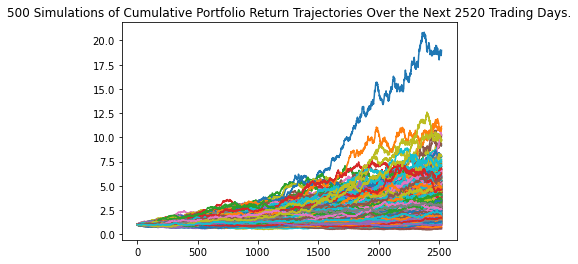

In [35]:
# Plot simulation outcomes

MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

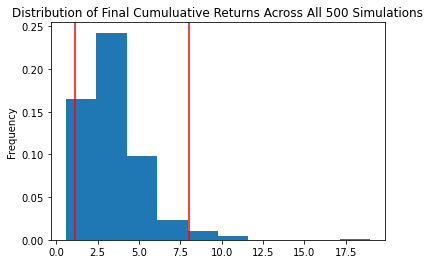

In [36]:
# Plot probability distribution and confidence intervals

MC_tenyear.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stats_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics

print(summary_stats_tbl)

count           500.000000
mean              3.450671
std               1.858375
min               0.576949
25%               2.248837
50%               3.093525
75%               4.251482
max              18.973898
95% CI Lower      1.106319
95% CI Upper      8.022258
Name: 2520, dtype: float64


In [38]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(summary_stats_tbl[8]*initial_investment,2)
ci_upper_ten = round(summary_stats_tbl[9]*initial_investment,2)


# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66379.15 and $481335.5
